# Data cleaning & Exploratory analysis

Finding variables that can be used to determine if the EEG wave is a characteristic of an epilepsy phenomenal

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [2]:
EEGdata = pd.read_csv("data.csv")

In [3]:
EEGdata

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [4]:
df2 = pd.melt(EEGdata, id_vars=["y"])

In [5]:
df2

,y,variable,value
0,4,Unnamed: 0,X21.V1.791
1,1,Unnamed: 0,X15.V1.924
2,5,Unnamed: 0,X8.V1.1
3,5,Unnamed: 0,X16.V1.60
4,5,Unnamed: 0,X20.V1.54
...,...,...,...
2058495,2,X178,-48
2058496,1,X178,170
2058497,5,X178,-8
2058498,3,X178,55


In [6]:
df2 = df2.iloc[11500:]

In [7]:
df2 = df2.reset_index()

In [8]:
df2 = df2.drop(columns = "index")
df2 = df2.drop(columns = "variable")

In [9]:
df2

,y,value
0,4,135
1,1,386
2,5,-32
3,5,-105
4,5,-9
...,...,...
2046995,2,-48
2046996,1,170
2046997,5,-8
2046998,3,55


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047000 entries, 0 to 2046999
Data columns (total 2 columns):
y        int64
value    object
dtypes: int64(1), object(1)
memory usage: 31.2+ MB


In [11]:
df2["y"] = df2["y"].astype('category')  #change y from int64 to category

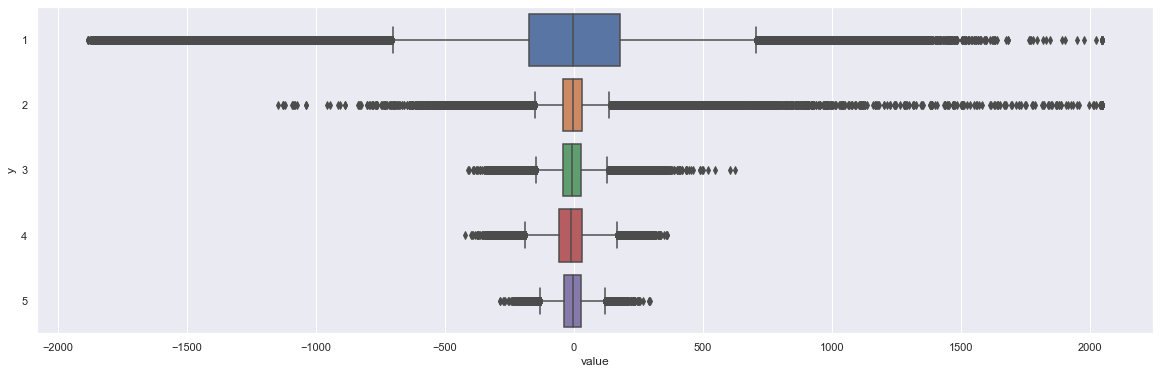

In [12]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'value', y = 'y', data = df2)

In [13]:
EEGdata["y"] = EEGdata["y"].astype('category') #change y from int64 to category

In [14]:
EEGdata['Average'] = EEGdata.mean(axis = 1) #calculate the average of datapoints for each label

In [15]:
EEGdata

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,Average
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,-16.910112
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,28.112360
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,-44.044944
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,-68.910112
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,-6.651685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,16,12,5,-1,-18,-37,-47,-48,2,5.157303
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-33,-7,14,27,48,77,117,170,1,5.674157
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-48,-61,-62,-67,-30,-2,-1,-8,5,6.752809
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,135,148,143,116,86,68,59,55,3,-38.842697


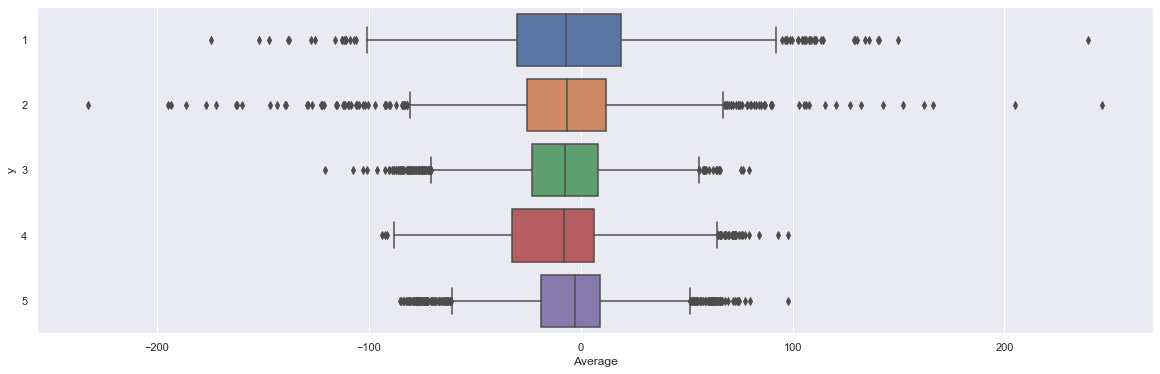

In [16]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Average', y = 'y', data = EEGdata)

In [17]:
absoluteEEGdata = EEGdata.copy()
squaredEEGdata = EEGdata.copy()
maxminEEGdata = EEGdata.copy()
maxrateEEGdata = EEGdata.copy()

In [18]:
absoluteEEGdata = absoluteEEGdata.drop(columns = "Unnamed: 0")
absoluteEEGdata = absoluteEEGdata.drop(columns = "y")
absoluteEEGdata = absoluteEEGdata.drop(columns = "Average")

squaredEEGdata = squaredEEGdata.drop(columns = "Unnamed: 0")
squaredEEGdata = squaredEEGdata.drop(columns = "y")
squaredEEGdata = squaredEEGdata.drop(columns = "Average")

maxminEEGdata = maxminEEGdata.drop(columns = "Unnamed: 0")
maxminEEGdata = maxminEEGdata.drop(columns = "Average")
                             
maxrateEEGdata = maxrateEEGdata.drop(columns = "Unnamed: 0")
maxrateEEGdata = maxrateEEGdata.drop(columns = "y")
maxrateEEGdata = maxrateEEGdata.drop(columns = "Average")

In [19]:
for i in squaredEEGdata:
    squaredEEGdata[i] = np.square(squaredEEGdata[i])    #calculate square of all the data points

In [20]:
squaredEEGdata

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,18225,36100,52441,49729,36864,15625,3025,81,1089,1444,...,64,289,225,961,5929,10609,16129,13456,6889,2601
1,148996,145924,126736,109561,102400,99225,94249,73984,59536,53824,...,28224,26896,22500,21316,23104,24649,24336,23716,20449,16641
2,1024,1521,2209,1369,1024,1296,3249,5329,7225,8836,...,841,3249,4096,2304,361,144,900,1225,1225,1296
3,11025,10201,9216,8464,7921,9025,10404,10000,7569,6241,...,6400,6724,6561,6400,5929,7225,5929,5184,4761,4225
4,81,4225,9604,10404,6084,2304,256,0,441,3481,...,100,16,4,144,1024,1681,4225,6889,7921,5329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,484,484,529,676,1296,1764,2025,1764,2025,2401,...,400,225,256,144,25,1,324,1369,2209,2304
11496,2209,121,784,5929,19881,44521,60516,57600,37249,18496,...,8836,4225,1089,49,196,729,2304,5929,13689,28900
11497,196,36,169,256,100,676,729,81,16,196,...,1764,4225,2304,3721,3844,4489,900,4,1,64
11498,1600,625,81,144,4,144,49,361,484,841,...,12996,14641,18225,21904,20449,13456,7396,4624,3481,3025


In [21]:
absoluteEEGdata = absoluteEEGdata.abs() #absolute value of all the data points

In [22]:
absoluteEEGdata

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,9,33,38,...,8,17,15,31,77,103,127,116,83,51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,32,39,47,37,32,36,57,73,85,94,...,29,57,64,48,19,12,30,35,35,36
3,105,101,96,92,89,95,102,100,87,79,...,80,82,81,80,77,85,77,72,69,65
4,9,65,98,102,78,48,16,0,21,59,...,10,4,2,12,32,41,65,83,89,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,22,22,23,26,36,42,45,42,45,49,...,20,15,16,12,5,1,18,37,47,48
11496,47,11,28,77,141,211,246,240,193,136,...,94,65,33,7,14,27,48,77,117,170
11497,14,6,13,16,10,26,27,9,4,14,...,42,65,48,61,62,67,30,2,1,8
11498,40,25,9,12,2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [23]:
EEGdata["Abs Average"] = absoluteEEGdata.mean(axis = 1)  #calculate the absolute average of the datapoints for each label
EEGdata["Mean Squared"] = squaredEEGdata.mean(axis = 1)  #calculate the mean squared of the datapoints for each label

In [24]:
EEGdata["Root Mean Squared"] = EEGdata["Mean Squared"].apply(np.sqrt) #calculate the root mean squared

In [25]:
EEGdata["Max Value"]= maxminEEGdata.max(axis=1) #find the max value of the datapoints for each label
EEGdata["Min Value"]= maxminEEGdata.min(axis=1) #find the min value of the datapoints for each label

In [26]:
df_diff = maxrateEEGdata.diff(axis = 1, periods = 1)
df_diff

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,NaN,55.0,39.0,-6.0,-31.0,-67.0,-70.0,-64.0,-24.0,-5.0,...,-2.0,-25.0,2.0,-16.0,-46.0,-26.0,-24.0,11.0,33.0,32.0
1,NaN,-4.0,-26.0,-25.0,-11.0,-5.0,-8.0,-35.0,-28.0,-12.0,...,5.0,-4.0,-14.0,-4.0,6.0,5.0,-1.0,-2.0,-11.0,-14.0
2,NaN,-7.0,-8.0,10.0,5.0,-4.0,-21.0,-16.0,-12.0,-9.0,...,35.0,28.0,7.0,-16.0,-29.0,-31.0,-18.0,-5.0,0.0,-1.0
3,NaN,4.0,5.0,4.0,3.0,-6.0,-7.0,2.0,13.0,8.0,...,-6.0,-2.0,1.0,1.0,3.0,-8.0,8.0,5.0,3.0,4.0
4,NaN,-56.0,-33.0,-4.0,24.0,30.0,32.0,16.0,-21.0,-38.0,...,-1.0,-6.0,-2.0,-14.0,-20.0,-9.0,-24.0,-18.0,-6.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,NaN,0.0,-1.0,-3.0,-10.0,-6.0,-3.0,3.0,-3.0,-4.0,...,-4.0,-5.0,1.0,-4.0,-7.0,-6.0,-17.0,-19.0,-10.0,-1.0
11496,NaN,36.0,39.0,49.0,64.0,70.0,35.0,-6.0,-47.0,-57.0,...,32.0,29.0,32.0,26.0,21.0,13.0,21.0,29.0,40.0,53.0
11497,NaN,-8.0,-19.0,-3.0,26.0,16.0,1.0,-36.0,13.0,10.0,...,36.0,-23.0,17.0,-13.0,-1.0,-5.0,37.0,28.0,1.0,-7.0
11498,NaN,15.0,16.0,-3.0,10.0,14.0,-5.0,12.0,3.0,7.0,...,9.0,7.0,14.0,13.0,-5.0,-27.0,-30.0,-18.0,-9.0,-4.0


In [27]:
diff_abs = df_diff.abs()
diff_abs

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,NaN,55.0,39.0,6.0,31.0,67.0,70.0,64.0,24.0,5.0,...,2.0,25.0,2.0,16.0,46.0,26.0,24.0,11.0,33.0,32.0
1,NaN,4.0,26.0,25.0,11.0,5.0,8.0,35.0,28.0,12.0,...,5.0,4.0,14.0,4.0,6.0,5.0,1.0,2.0,11.0,14.0
2,NaN,7.0,8.0,10.0,5.0,4.0,21.0,16.0,12.0,9.0,...,35.0,28.0,7.0,16.0,29.0,31.0,18.0,5.0,0.0,1.0
3,NaN,4.0,5.0,4.0,3.0,6.0,7.0,2.0,13.0,8.0,...,6.0,2.0,1.0,1.0,3.0,8.0,8.0,5.0,3.0,4.0
4,NaN,56.0,33.0,4.0,24.0,30.0,32.0,16.0,21.0,38.0,...,1.0,6.0,2.0,14.0,20.0,9.0,24.0,18.0,6.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,NaN,0.0,1.0,3.0,10.0,6.0,3.0,3.0,3.0,4.0,...,4.0,5.0,1.0,4.0,7.0,6.0,17.0,19.0,10.0,1.0
11496,NaN,36.0,39.0,49.0,64.0,70.0,35.0,6.0,47.0,57.0,...,32.0,29.0,32.0,26.0,21.0,13.0,21.0,29.0,40.0,53.0
11497,NaN,8.0,19.0,3.0,26.0,16.0,1.0,36.0,13.0,10.0,...,36.0,23.0,17.0,13.0,1.0,5.0,37.0,28.0,1.0,7.0
11498,NaN,15.0,16.0,3.0,10.0,14.0,5.0,12.0,3.0,7.0,...,9.0,7.0,14.0,13.0,5.0,27.0,30.0,18.0,9.0,4.0


In [28]:
diff_abs_max= diff_abs.max(axis=1)
EEGdata["Max rate of change"]= diff_abs_max.div(1/178)
# each row (from X1 to X178) corresponds to the wave pattern in 1 second

In [29]:
EEGdata

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X177,X178,y,Average,Abs Average,Mean Squared,Root Mean Squared,Max Value,Min Value,Max rate of change
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-83,-51,4,-16.910112,77.382022,9446.539326,97.193309,229.0,-281.0,17266.0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,143,129,1,28.112360,375.629213,223419.348315,472.672559,513.0,-1716.0,124244.0
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,-35,-36,5,-44.044944,53.921348,3892.393258,62.389048,80.0,-126.0,7654.0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-69,-65,5,-68.910112,68.910112,5002.168539,70.726010,5.0,-105.0,4628.0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,-89,-73,5,-6.651685,30.921348,1541.393258,39.260581,78.0,-103.0,9968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,-47,-48,2,5.157303,33.078652,1491.078652,38.614488,73.0,-79.0,3382.0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,117,170,1,5.674157,125.988764,26626.808989,163.177232,471.0,-388.0,32040.0
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-1,-8,5,6.752809,36.067416,1996.134831,44.678125,121.0,-90.0,12282.0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,59,55,3,-38.842697,60.719101,5531.910112,74.376812,148.0,-157.0,8900.0


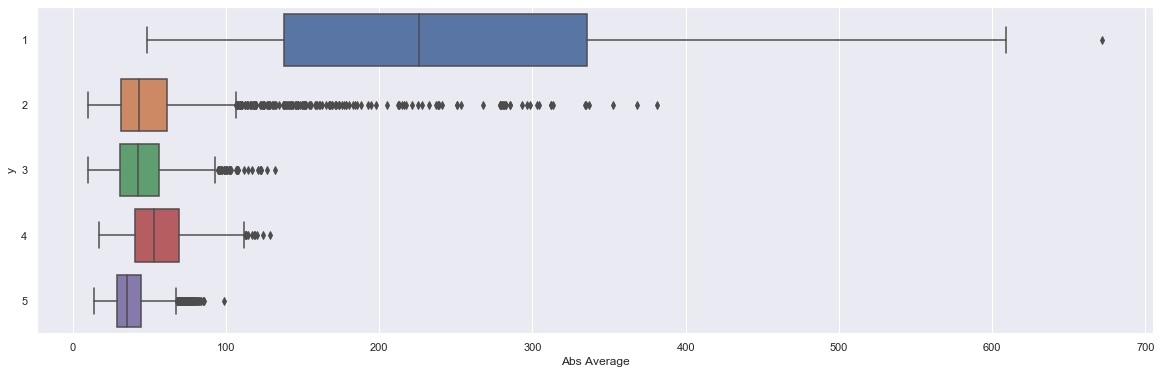

In [30]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Abs Average', y = 'y', data = EEGdata)

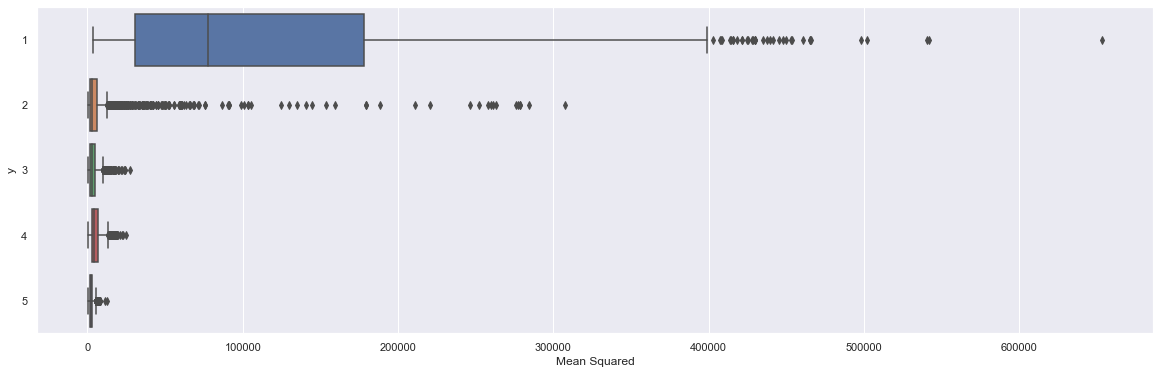

In [31]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Mean Squared', y = 'y', data = EEGdata)

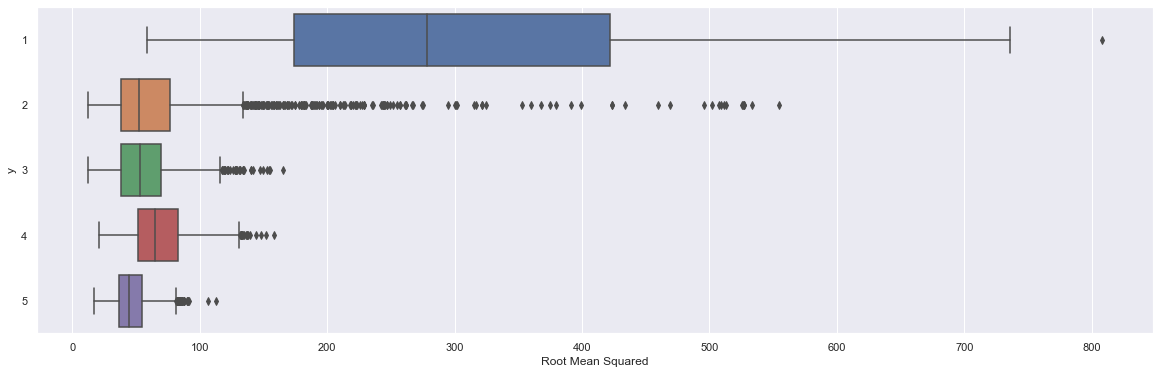

In [32]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Root Mean Squared', y = 'y', data = EEGdata)

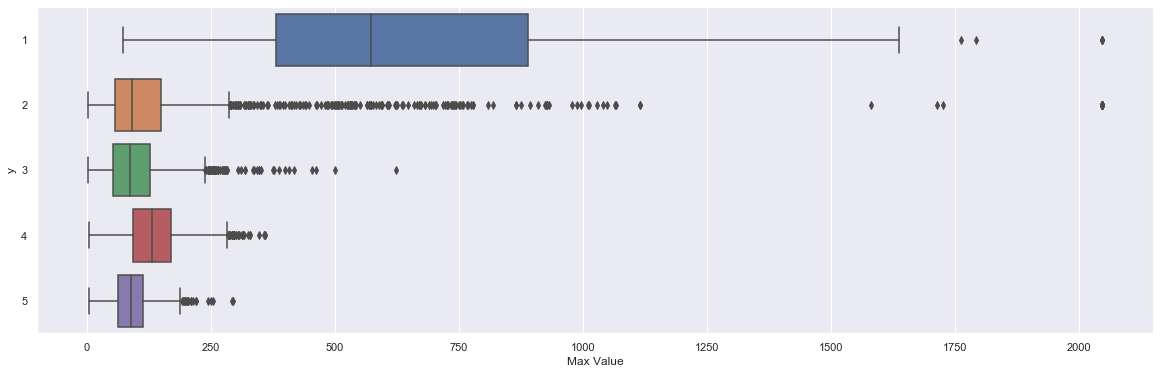

In [33]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Max Value', y = 'y', data = EEGdata)

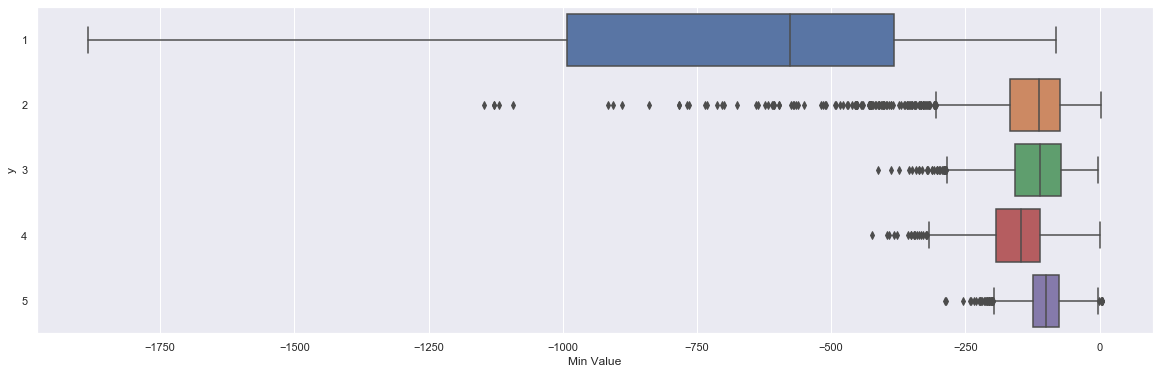

In [34]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Min Value', y = 'y', data = EEGdata)

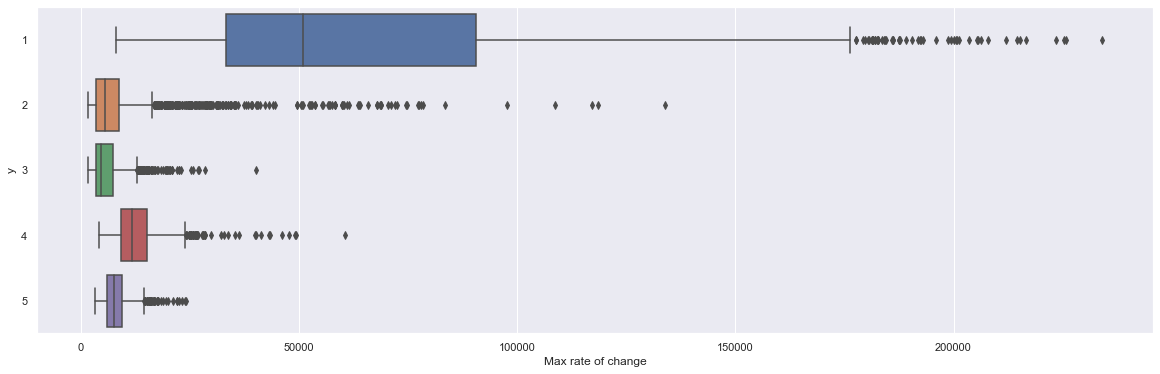

In [35]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Max rate of change', y = 'y', data = EEGdata)

# Change y to seizure and no seizure

In [36]:
EEGdata["condition"] = EEGdata["y"].apply(lambda x: "seizure" if x == 1 else "no seizure")

In [37]:
EEGdata["condition"] = EEGdata["condition"].astype("category") 

In [38]:
EEGdata["condition"]

0        no seizure
1           seizure
2        no seizure
3        no seizure
4        no seizure
            ...    
11495    no seizure
11496       seizure
11497    no seizure
11498    no seizure
11499    no seizure
Name: condition, Length: 11500, dtype: category
Categories (2, object): [no seizure, seizure]

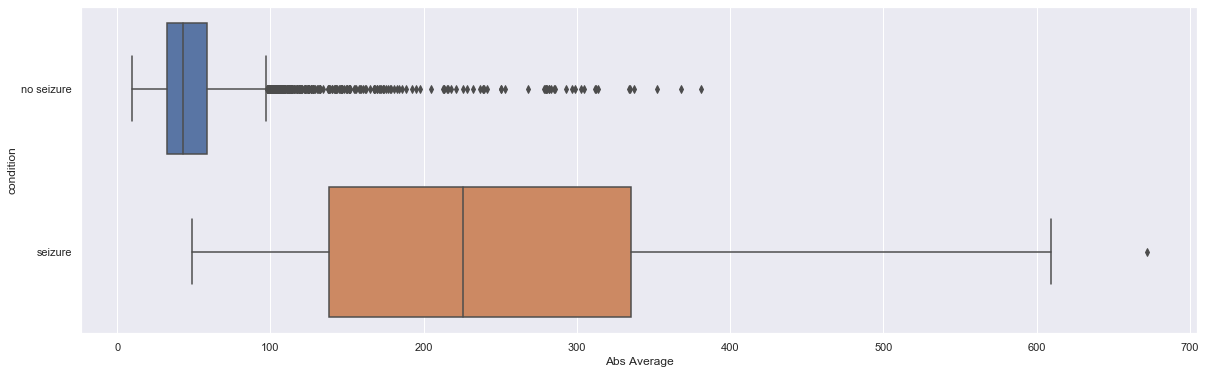

In [39]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Abs Average', y = 'condition', data = EEGdata)

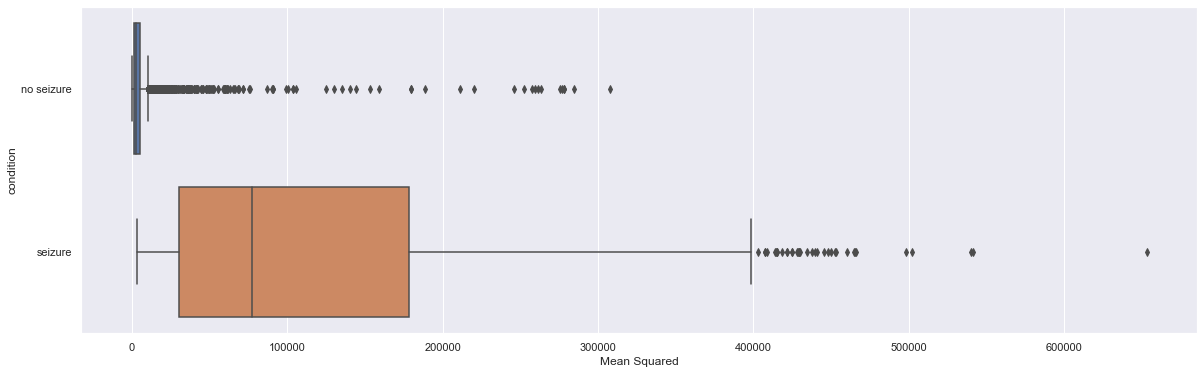

In [40]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Mean Squared', y = 'condition', data = EEGdata)

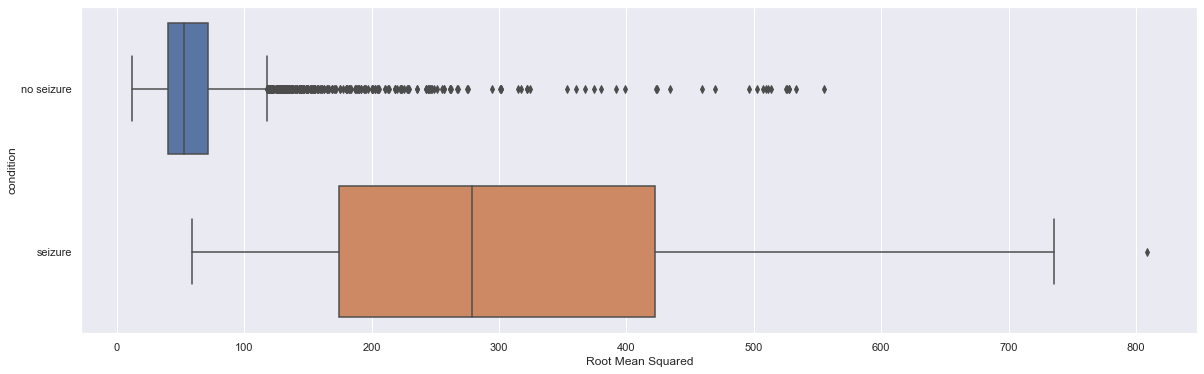

In [41]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Root Mean Squared', y = 'condition', data = EEGdata)

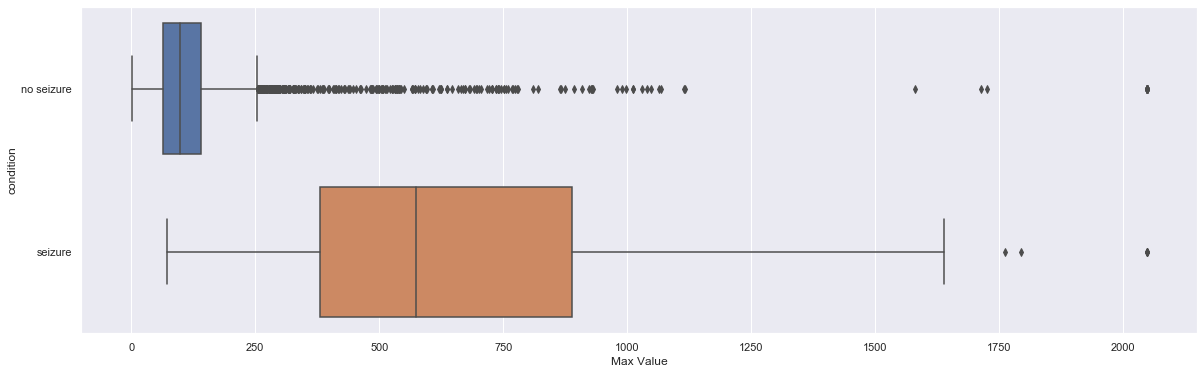

In [42]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Max Value', y = 'condition', data = EEGdata)

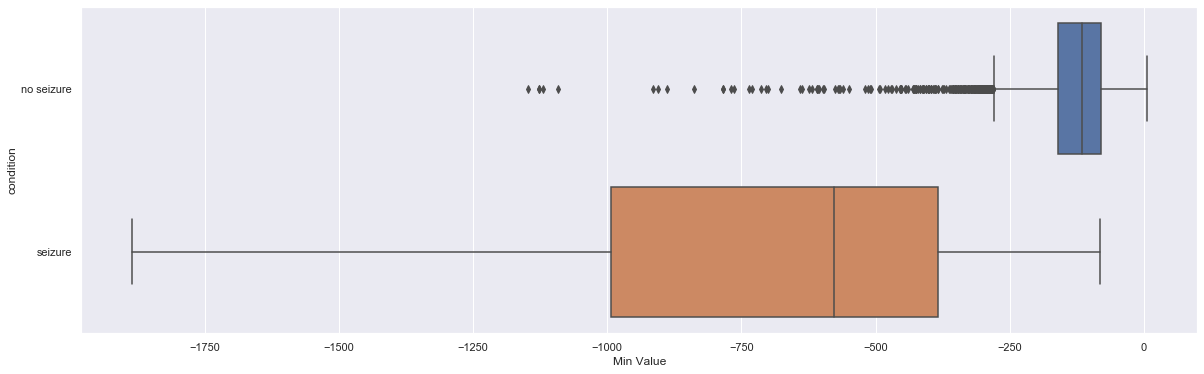

In [43]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Min Value', y = 'condition', data = EEGdata)

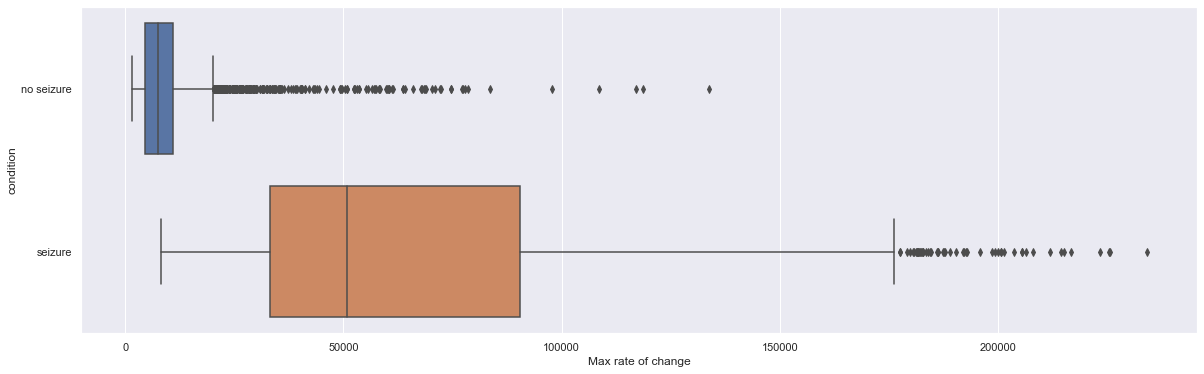

In [44]:
f, axes = plt.subplots(1, 1, figsize=(20,6))
sb.boxplot(x = 'Max rate of change', y = 'condition', data = EEGdata)

# Building prediction models using train test split to try to determine an epilepsy EEG wave

# Univariate Decision Tree

In [45]:
EEGdata

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X178,y,Average,Abs Average,Mean Squared,Root Mean Squared,Max Value,Min Value,Max rate of change,condition
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-51,4,-16.910112,77.382022,9446.539326,97.193309,229.0,-281.0,17266.0,no seizure
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,129,1,28.112360,375.629213,223419.348315,472.672559,513.0,-1716.0,124244.0,seizure
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,-36,5,-44.044944,53.921348,3892.393258,62.389048,80.0,-126.0,7654.0,no seizure
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-65,5,-68.910112,68.910112,5002.168539,70.726010,5.0,-105.0,4628.0,no seizure
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,-73,5,-6.651685,30.921348,1541.393258,39.260581,78.0,-103.0,9968.0,no seizure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,-48,2,5.157303,33.078652,1491.078652,38.614488,73.0,-79.0,3382.0,no seizure
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,170,1,5.674157,125.988764,26626.808989,163.177232,471.0,-388.0,32040.0,seizure
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-8,5,6.752809,36.067416,1996.134831,44.678125,121.0,-90.0,12282.0,no seizure
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,55,3,-38.842697,60.719101,5531.910112,74.376812,148.0,-157.0,8900.0,no seizure


In [46]:
AbsAvg = pd.DataFrame(EEGdata['Abs Average']) 
cond = pd.DataFrame(EEGdata['condition'])

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(AbsAvg, cond, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


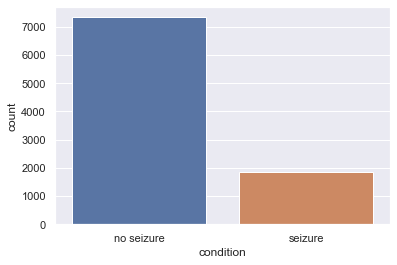

In [48]:
sb.countplot(y_train['condition'])

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import metrics

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9558695652173913

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9530434782608695



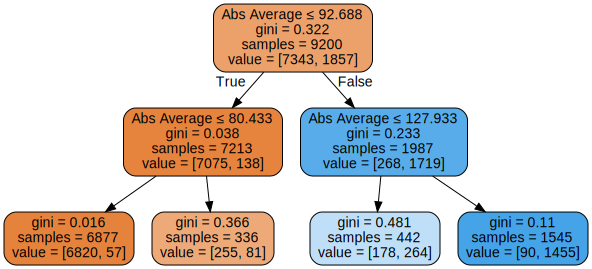

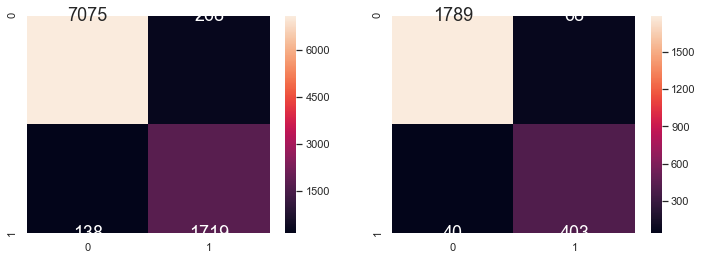

In [50]:
dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,              
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [51]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7075  268]
 [ 138 1719]]
FPR= 0.036497344409641835
FNR= 0.07431340872374798

Test Dataset:
[[1789   68]
 [  40  403]]
FPR= 0.0366182014001077
FNR= 0.09029345372460497


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9576086956521739

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9539130434782609



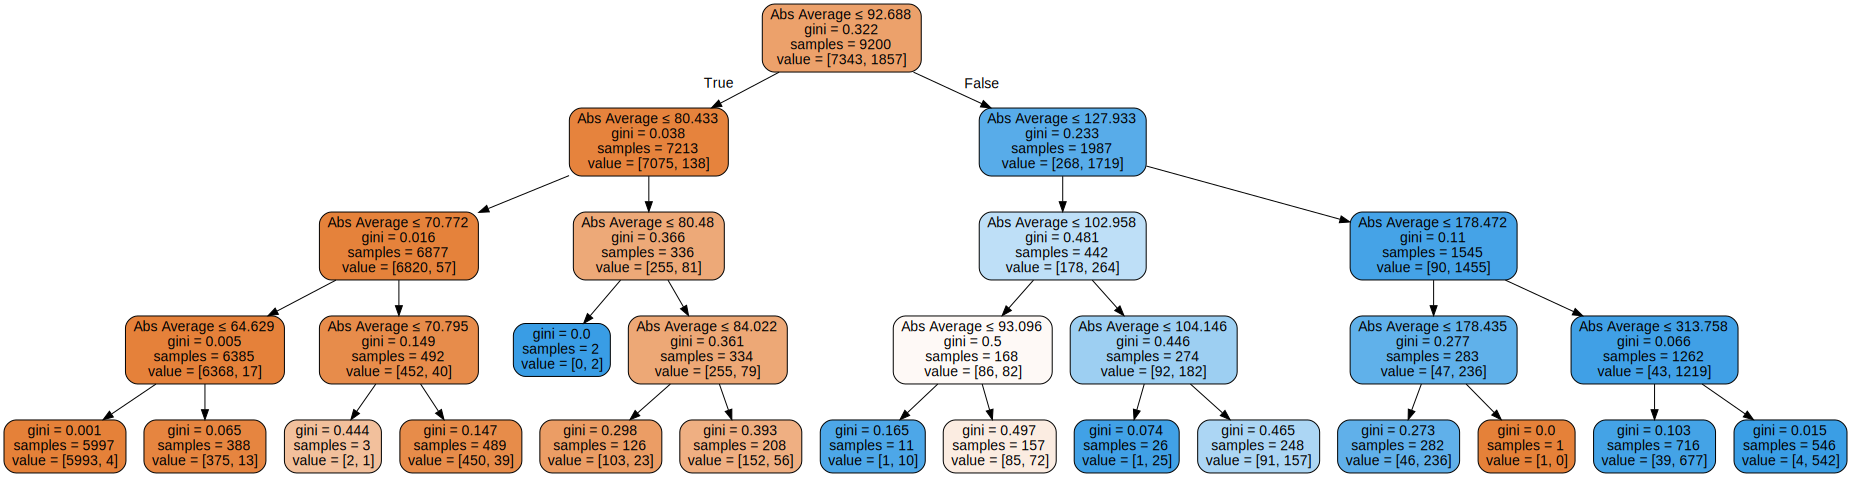

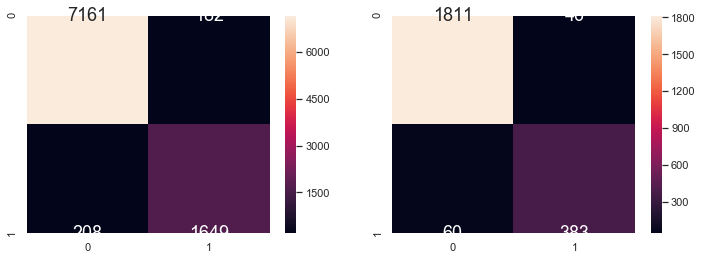

In [52]:
dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,              
                          out_file = None,                      
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [53]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7161  182]
 [ 208 1649]]
FPR= 0.02478551000953289
FNR= 0.11200861604738827

Test Dataset:
[[1811   46]
 [  60  383]]
FPR= 0.024771136241249325
FNR= 0.13544018058690746


In [54]:
MeanSqr = pd.DataFrame(EEGdata['Mean Squared']) 
cond = pd.DataFrame(EEGdata['condition'])

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(MeanSqr, cond, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9602173913043478

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9547826086956521



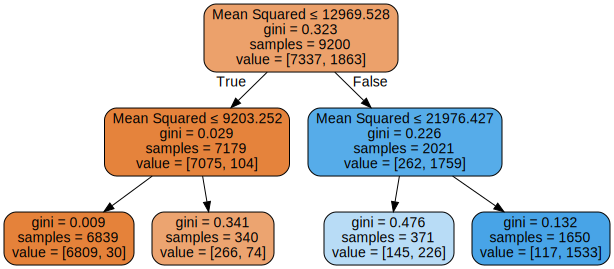

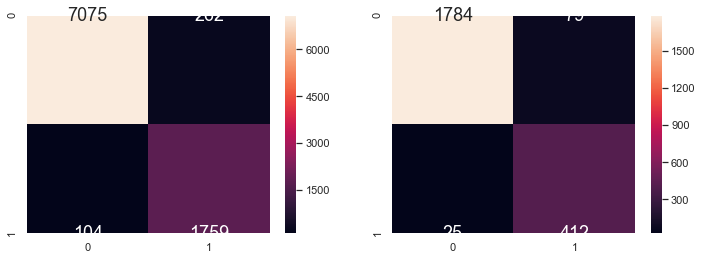

In [56]:
dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,              
                          out_file = None,                             
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                   

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [57]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7075  262]
 [ 104 1759]]
FPR= 0.0357094180182636
FNR= 0.055823939881910895

Test Dataset:
[[1784   79]
 [  25  412]]
FPR= 0.042404723564143855
FNR= 0.057208237986270026


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9607608695652174

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9534782608695652



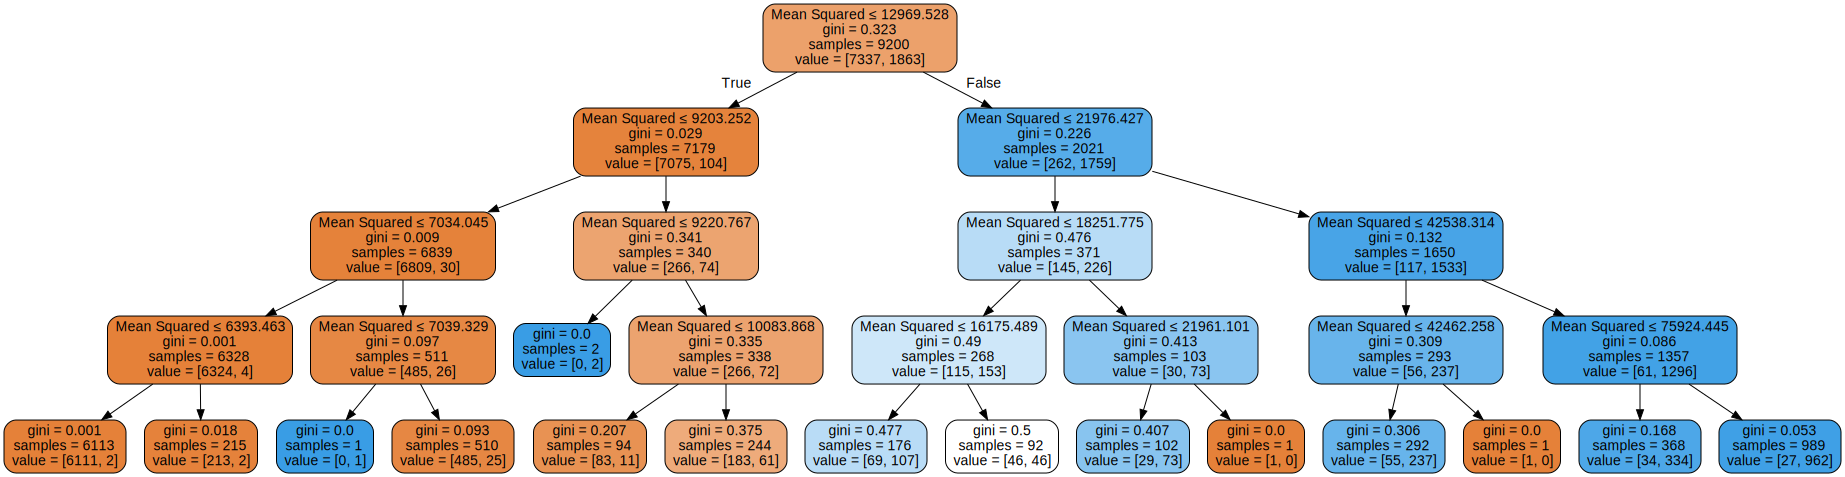

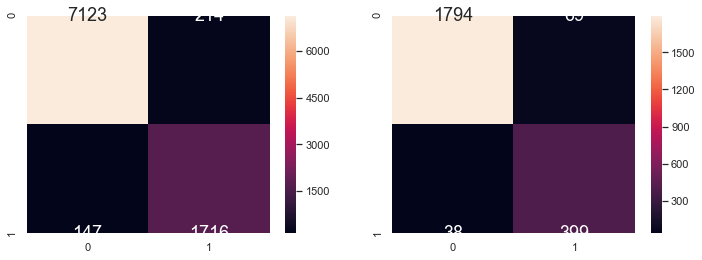

In [58]:
dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,              
                          out_file = None,                              
                          filled = True,                               
                          rounded = True,                               
                          special_characters = True)                   

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [59]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7123  214]
 [ 147 1716]]
FPR= 0.029167234564535915
FNR= 0.07890499194847021

Test Dataset:
[[1794   69]
 [  38  399]]
FPR= 0.037037037037037035
FNR= 0.08695652173913043


In [60]:
RootMeanSqr = pd.DataFrame(EEGdata['Root Mean Squared']) 
cond = pd.DataFrame(EEGdata['condition'])

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(RootMeanSqr, cond, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9586956521739131

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9608695652173913



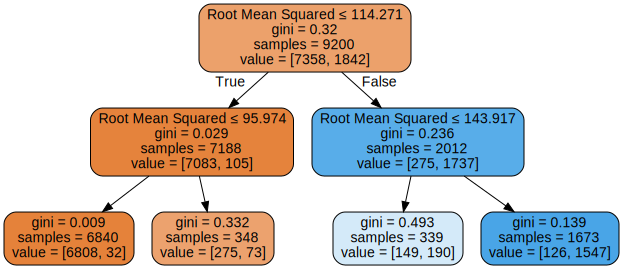

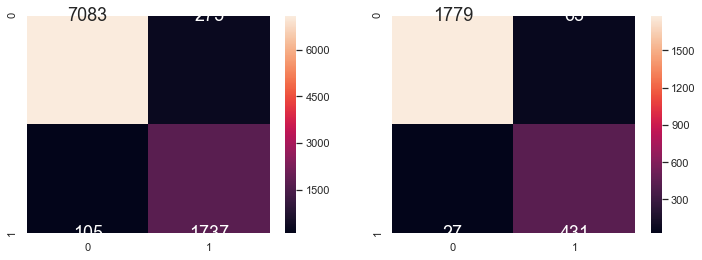

In [62]:
dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,             
                          out_file = None,                             
                          filled = True,                               
                          rounded = True,                               
                          special_characters = True)                    

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [63]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7083  275]
 [ 105 1737]]
FPR= 0.03737428649089426
FNR= 0.057003257328990226

Test Dataset:
[[1779   63]
 [  27  431]]
FPR= 0.03420195439739414
FNR= 0.05895196506550218


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9595652173913043

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9608695652173913



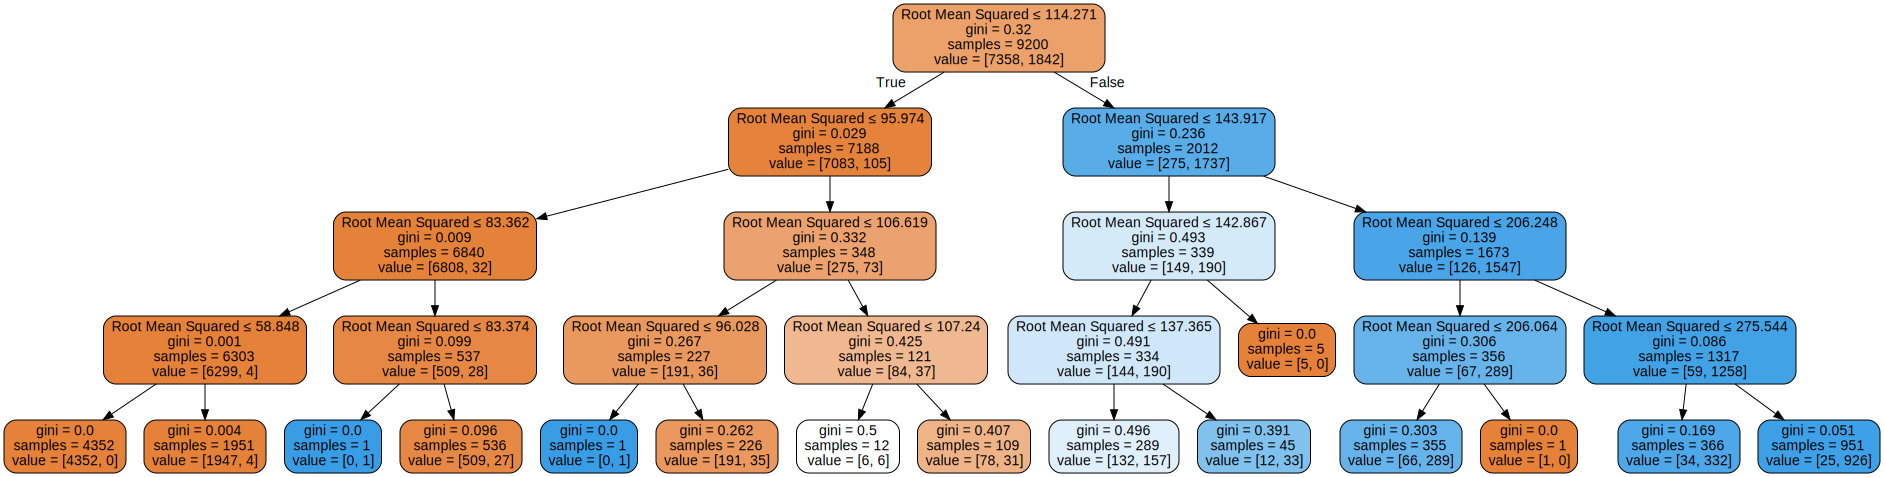

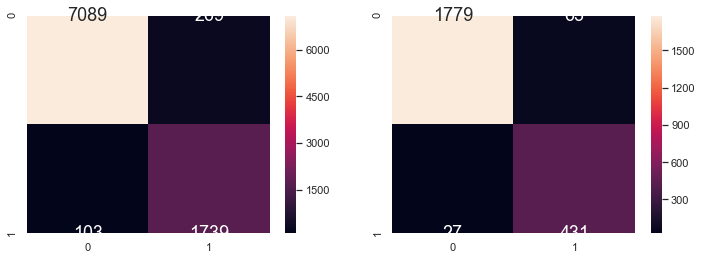

In [64]:
dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,              
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [65]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7089  269]
 [ 103 1739]]
FPR= 0.036558847512911115
FNR= 0.05591748099891422

Test Dataset:
[[1779   63]
 [  27  431]]
FPR= 0.03420195439739414
FNR= 0.05895196506550218


In [66]:
Max = pd.DataFrame(EEGdata['Max Value']) 
cond = pd.DataFrame(EEGdata['condition'])

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Max, cond, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9505434782608696

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9556521739130435



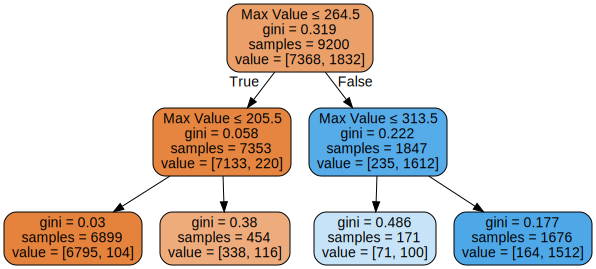

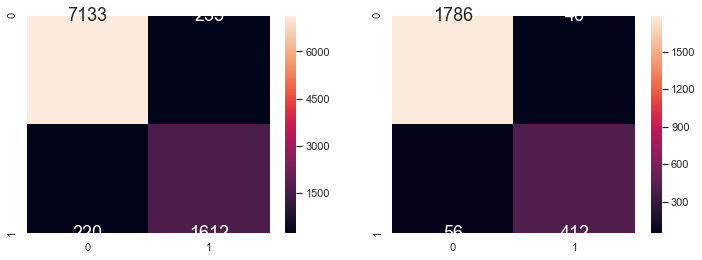

In [68]:
dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,              
                          out_file = None,                              
                          filled = True,                               
                          rounded = True,                               
                          special_characters = True)                    

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [69]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7133  235]
 [ 220 1612]]
FPR= 0.03189467969598263
FNR= 0.12008733624454149

Test Dataset:
[[1786   46]
 [  56  412]]
FPR= 0.025109170305676855
FNR= 0.11965811965811966


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9516304347826087

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9565217391304348



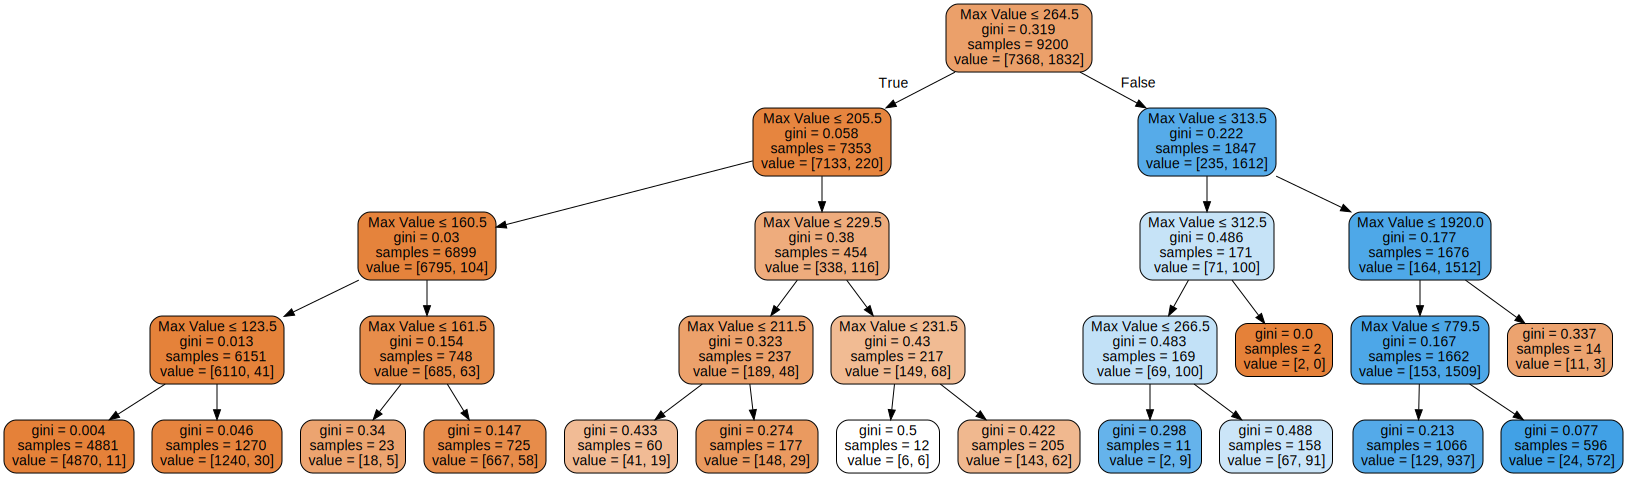

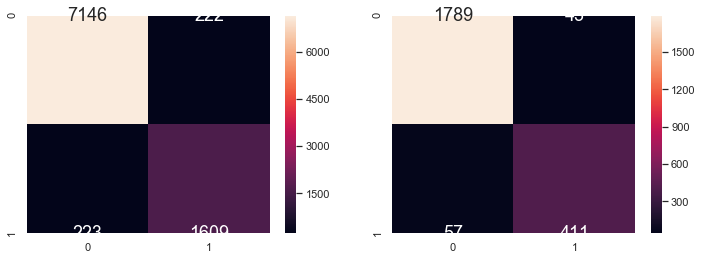

In [70]:
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,              
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [71]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7146  222]
 [ 223 1609]]
FPR= 0.03013029315960912
FNR= 0.12172489082969433

Test Dataset:
[[1789   43]
 [  57  411]]
FPR= 0.023471615720524017
FNR= 0.12179487179487179


In [72]:
Min = pd.DataFrame(EEGdata['Min Value']) 
cond = pd.DataFrame(EEGdata['condition'])

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Min, cond, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9595652173913043

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9543478260869566



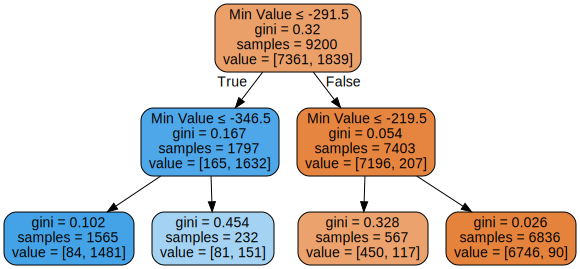

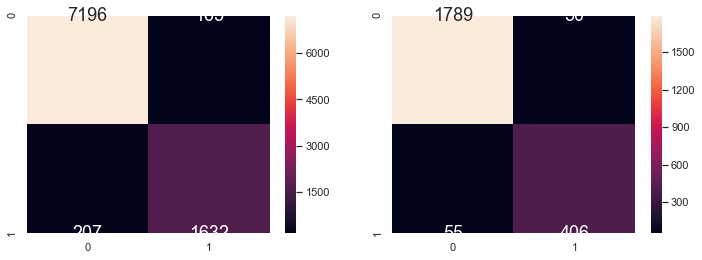

In [74]:
dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,               
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [75]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7196  165]
 [ 207 1632]]
FPR= 0.02241543268577639
FNR= 0.11256117455138662

Test Dataset:
[[1789   50]
 [  55  406]]
FPR= 0.027188689505165852
FNR= 0.1193058568329718


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9601086956521739

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9530434782608695



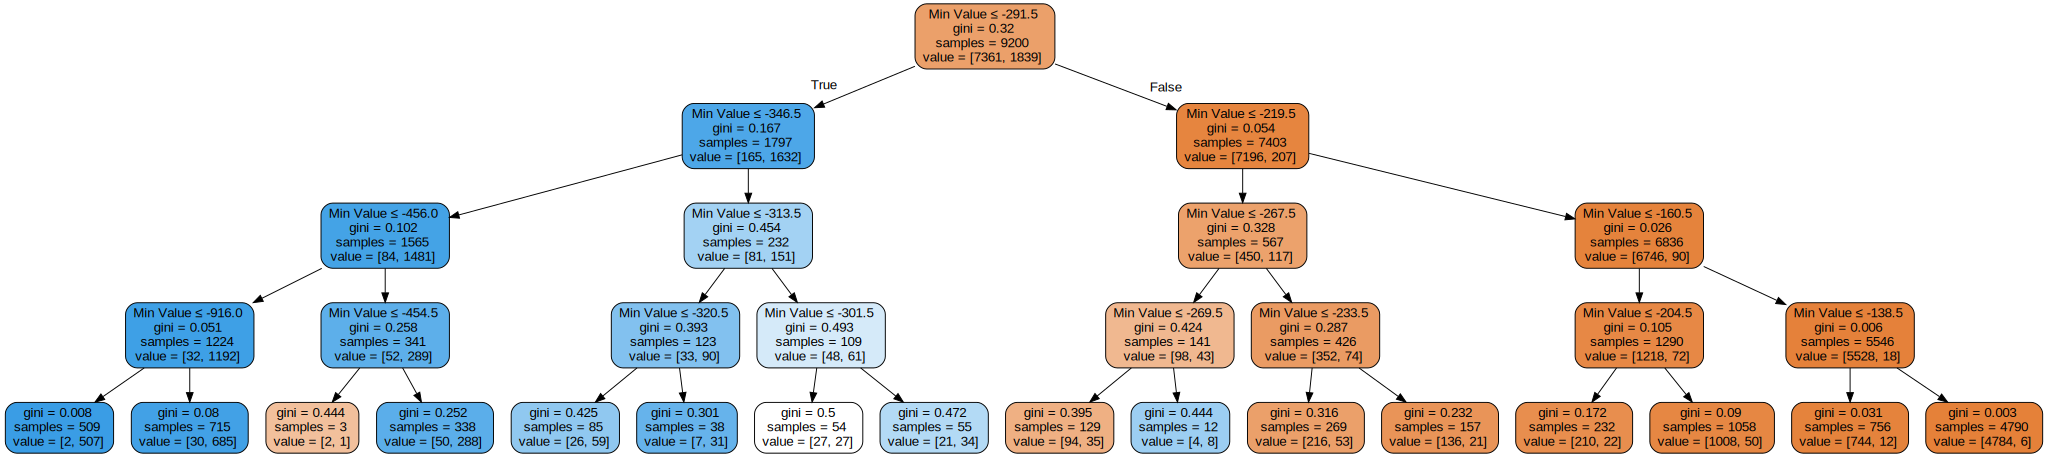

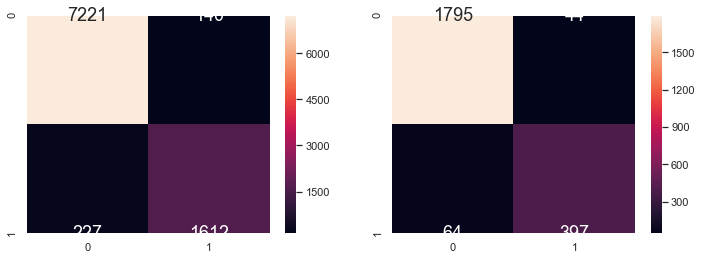

In [76]:
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,              
                          out_file = None,                             
                          filled = True,                               
                          rounded = True,                               
                          special_characters = True)                   

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [77]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7221  140]
 [ 227 1612]]
FPR= 0.0190191550061133
FNR= 0.12343665035345297

Test Dataset:
[[1795   44]
 [  64  397]]
FPR= 0.02392604676454595
FNR= 0.13882863340563992


In [78]:
MaxRate = pd.DataFrame(EEGdata['Max rate of change']) 
cond = pd.DataFrame(EEGdata['condition'])

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(MaxRate, cond, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9576086956521739

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9552173913043478



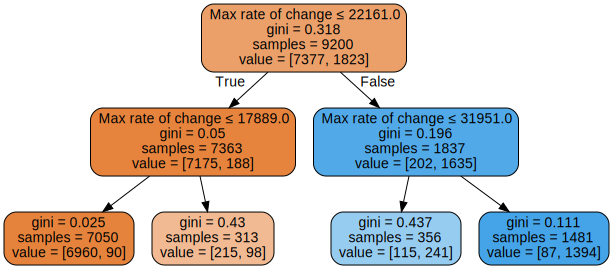

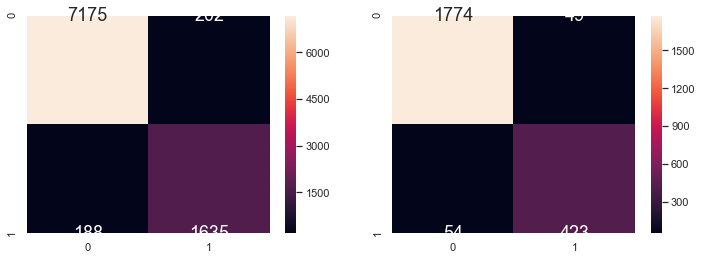

In [80]:
dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,              
                          out_file = None,                             
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                   

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [81]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7175  202]
 [ 188 1635]]
FPR= 0.027382404771587366
FNR= 0.10312671420735052

Test Dataset:
[[1774   49]
 [  54  423]]
FPR= 0.026878771256171146
FNR= 0.11320754716981132


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9576086956521739

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9552173913043478



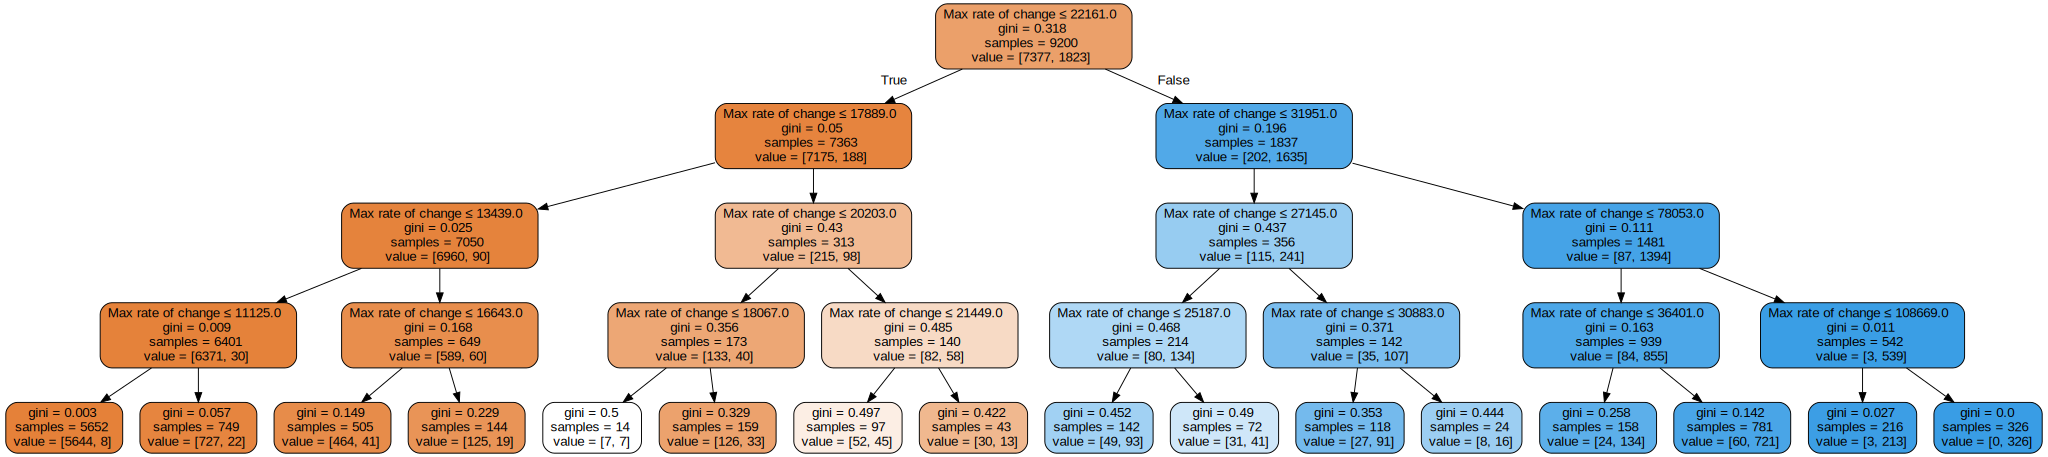

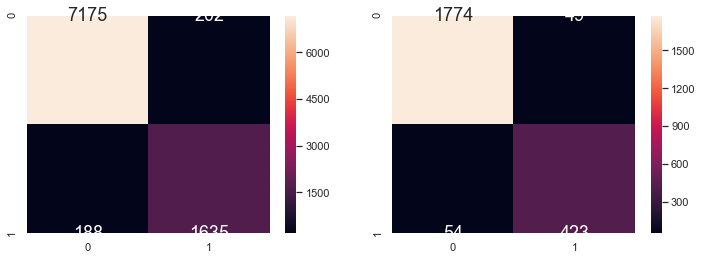

In [82]:
dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,              
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                              
                          special_characters = True)                    

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

In [83]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7175  202]
 [ 188 1635]]
FPR= 0.027382404771587366
FNR= 0.10312671420735052

Test Dataset:
[[1774   49]
 [  54  423]]
FPR= 0.026878771256171146
FNR= 0.11320754716981132


# Multivariate Decision Tree

In [84]:
y = pd.DataFrame(EEGdata["condition"])
X = pd.DataFrame(EEGdata[["Abs Average", "Mean Squared", "Root Mean Squared", "Max Value", "Min Value", "Max rate of change"]])

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 6)
Test Set  : (2300, 1) (2300, 6)


In [86]:
X_train.describe()

,Abs Average,Mean Squared,Root Mean Squared,Max Value,Min Value,Max rate of change
count,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000
mean,86.944619,26819.553718,108.201266,221.976739,-246.401196,20008.206087
std,97.682623,66138.532449,122.937718,284.828426,321.941688,30354.526447
min,9.769663,146.404494,12.099772,2.000000,-1885.000000,1602.000000
25%,34.875000,1862.265449,43.153974,73.000000,-222.000000,5340.000000
50%,49.421348,3696.876404,60.801944,117.000000,-133.000000,8900.000000
75%,80.265449,9483.549157,97.383513,202.000000,-89.000000,16732.000000
max,671.876404,653379.000000,808.318625,2047.000000,5.000000,234070.000000


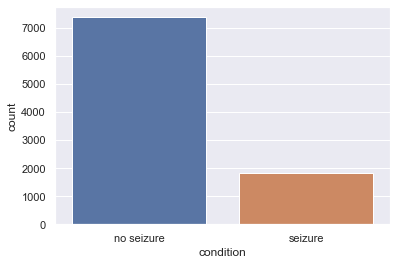

In [87]:
sb.countplot(y_train["condition"])

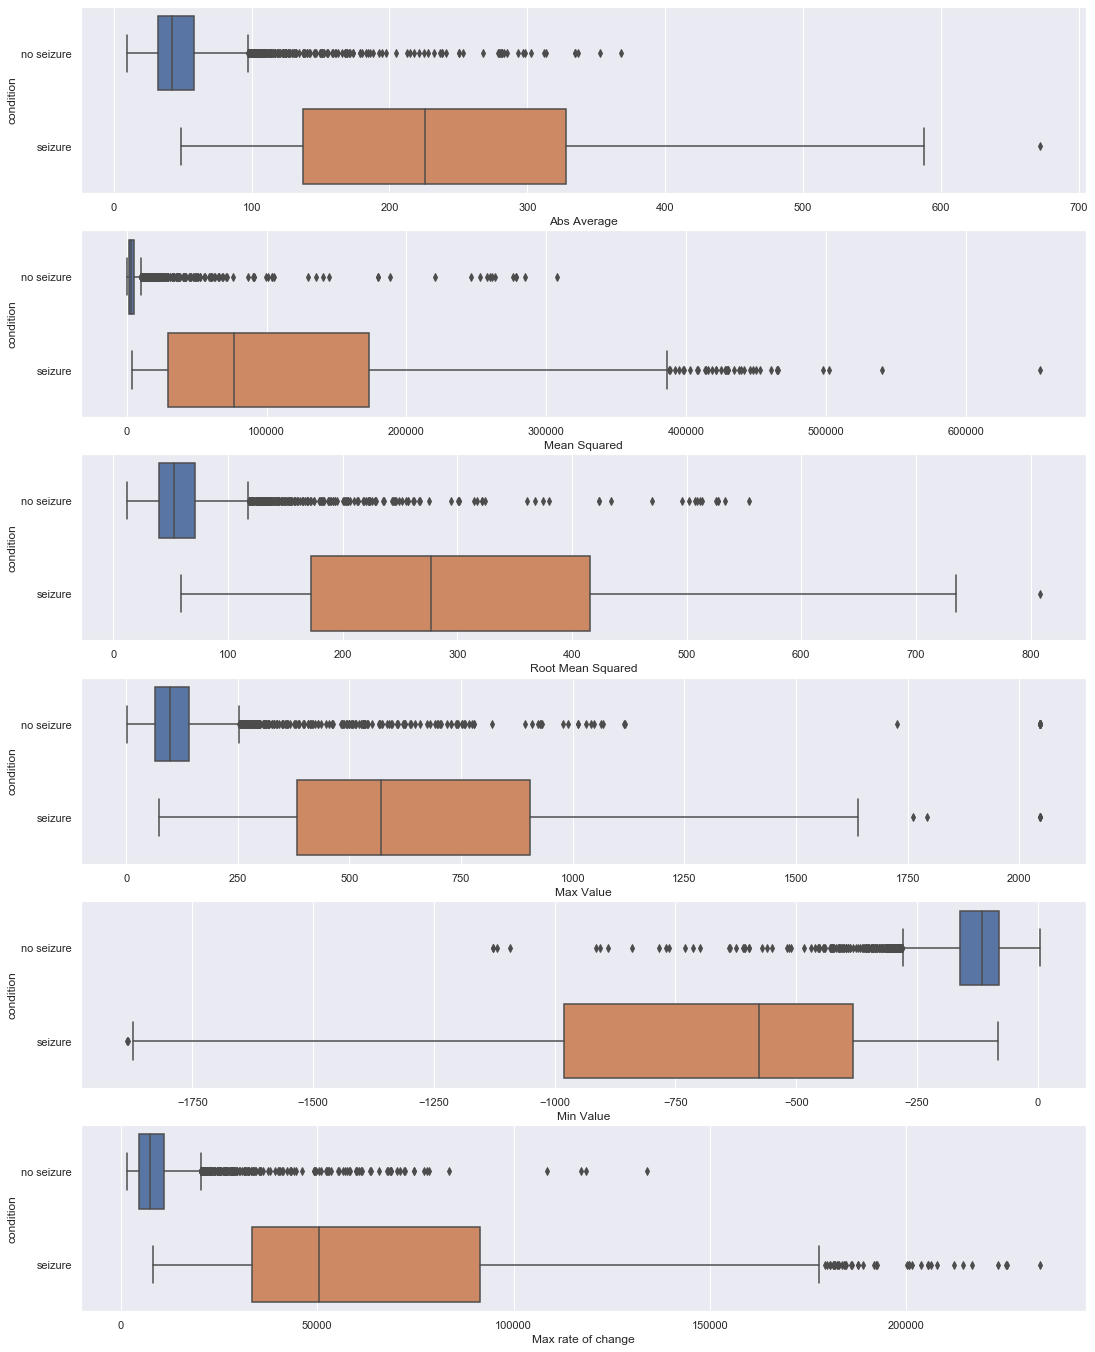

In [88]:
trainDF = pd.concat([y_train, X_train], axis = 1)

f, axes = plt.subplots(6, 1, figsize=(18, 24))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "condition", data = trainDF, orient = "h", ax = axes[count])
    count += 1

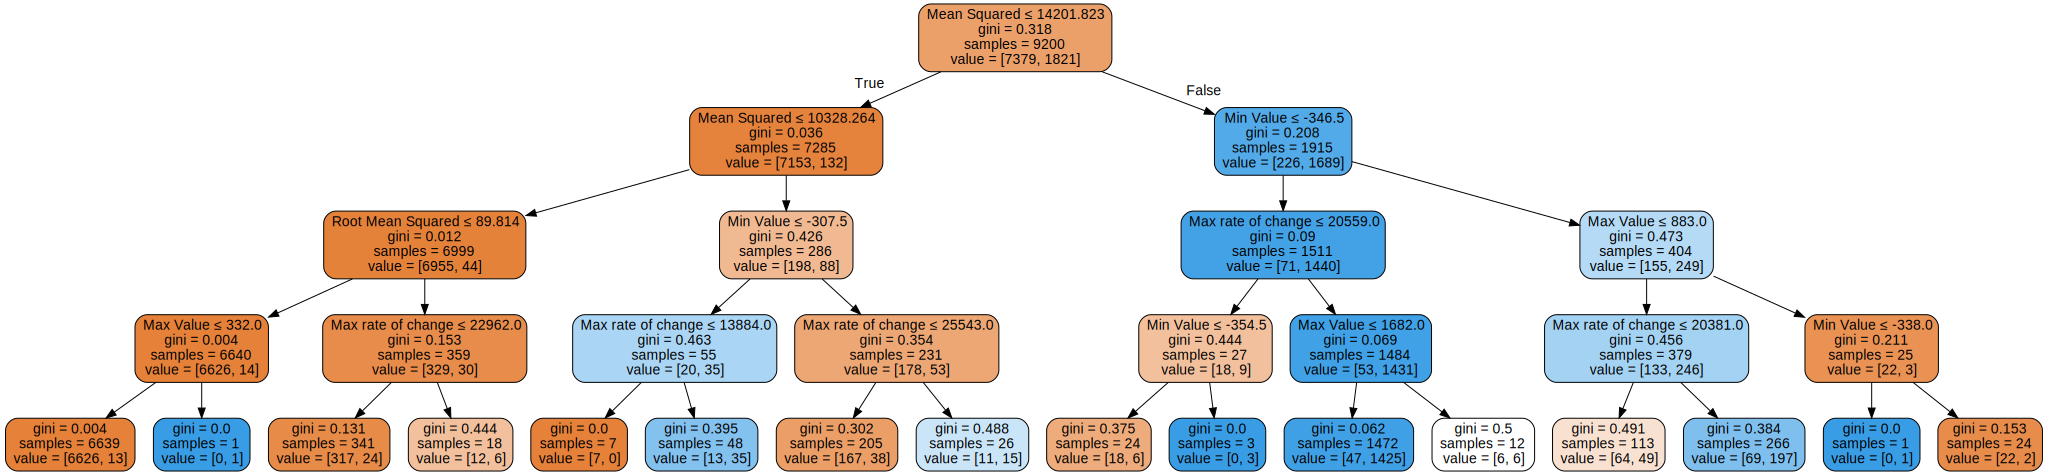

In [92]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(X_train, y_train)                    

from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      
                          feature_names = X_train.columns,             
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                   

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
import graphviz
graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9691304347826087

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9652173913043478



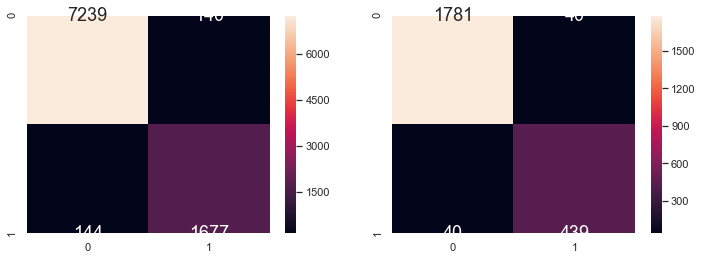

In [93]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [94]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7239  140]
 [ 144 1677]]
FPR= 0.018972760536658084
FNR= 0.07907742998352553

Test Dataset:
[[1781   40]
 [  40  439]]
FPR= 0.021965952773201538
FNR= 0.08350730688935282


# Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [104]:
EEGdata["binary"] = EEGdata["condition"].apply(lambda x: 1 if x == "seizure" else 0) #convert condition to '1' for seizure and '0' for non seizure

In [105]:
EEGdata["binary"] = EEGdata["binary"].astype(int) #convert to int for easy plotting

In [106]:
y = pd.DataFrame(EEGdata["binary"])
X = pd.DataFrame(EEGdata["Abs Average"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9480434782608695

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9534782608695652



C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


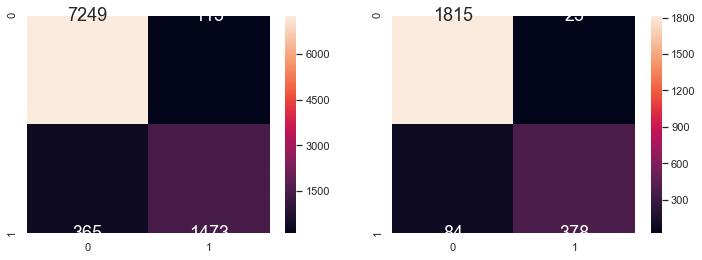

In [107]:
LogReg = LogisticRegression()

LogReg.fit(X_train, y_train) #fit Logistic Regression to the train dataset

y_train_pred = LogReg.predict(X_train)
y_test_pred = LogReg.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", LogReg.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", LogReg.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [108]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7249  113]
 [ 365 1473]]
FPR= 0.01534908992121706
FNR= 0.1985854189336235

Test Dataset:
[[1815   23]
 [  84  378]]
FPR= 0.012513601741022852
FNR= 0.18181818181818182


In [109]:
LogReg = LogisticRegression()

LogReg.fit(X, np.ravel(y))
print (LogReg.score(X, y))

0.9494782608695652


C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


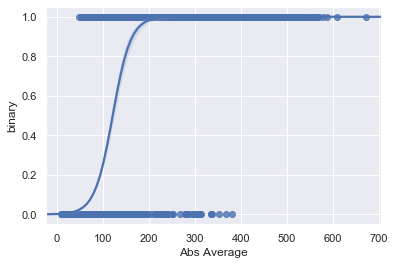

In [110]:
sb.regplot(x = "Abs Average", y = "binary", data = EEGdata, logistic = True) #plot datapoints and the logistic function curve

In [111]:
y = pd.DataFrame(EEGdata["binary"])
X = pd.DataFrame(EEGdata["Mean Squared"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9393478260869565

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9382608695652174



C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


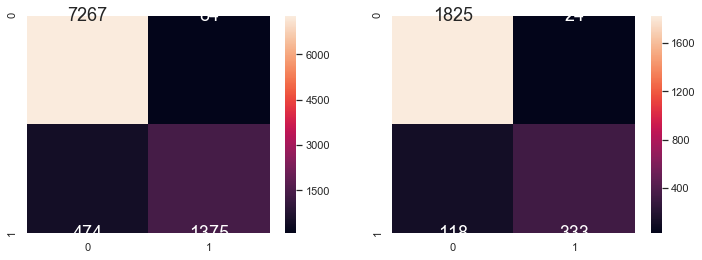

In [112]:
LogReg = LogisticRegression()

LogReg.fit(X_train,np.ravel(y_train)) #fit Logistic Regression to the train dataset

y_train_pred = LogReg.predict(X_train)
y_test_pred = LogReg.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", LogReg.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", LogReg.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [113]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7267   84]
 [ 474 1375]]
FPR= 0.011427016732417358
FNR= 0.25635478637101133

Test Dataset:
[[1825   24]
 [ 118  333]]
FPR= 0.012979989183342347
FNR= 0.2616407982261641


In [114]:
y = pd.DataFrame(EEGdata["binary"])
X = pd.DataFrame(EEGdata["Mean Squared"])

LogReg.fit(X,np.ravel(y))
print (LogReg.score(X, y))

0.938


C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


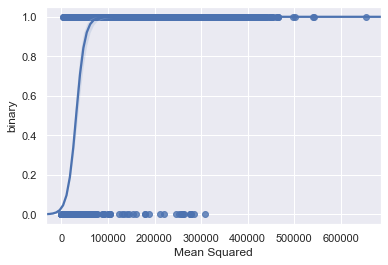

In [115]:
sb.regplot(x = "Mean Squared", y = "binary", data = EEGdata, logistic = True) #plot datapoints and the logistic function curve

In [116]:
y = pd.DataFrame(EEGdata["binary"])
X = pd.DataFrame(EEGdata["Root Mean Squared"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9488043478260869

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.95



C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


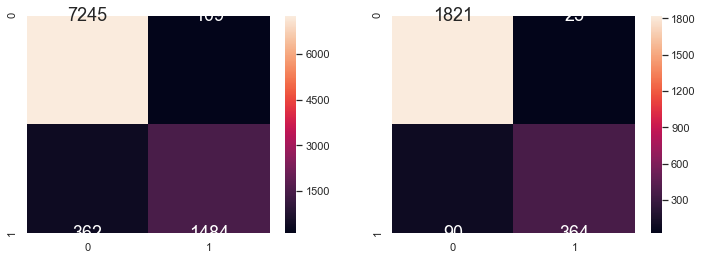

In [117]:
LogReg = LogisticRegression()

LogReg.fit(X_train,np.ravel(y_train)) #fit Logistic Regression to the train dataset

y_train_pred = LogReg.predict(X_train)
y_test_pred = LogReg.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", LogReg.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", LogReg.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [118]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7245  109]
 [ 362 1484]]
FPR= 0.014821865651346206
FNR= 0.19609967497291442

Test Dataset:
[[1821   25]
 [  90  364]]
FPR= 0.013542795232936078
FNR= 0.19823788546255505


In [119]:
LogReg = LogisticRegression()

y = pd.DataFrame(EEGdata["binary"])
X = pd.DataFrame(EEGdata["Root Mean Squared"])

LogReg.fit(X,np.ravel(y))
print (LogReg.score(X, y))

0.9498260869565217


C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


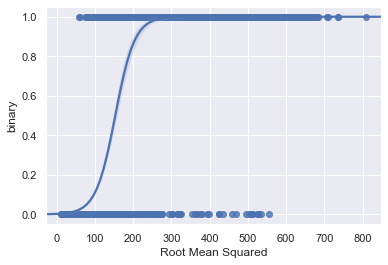

In [120]:
sb.regplot(x = "Root Mean Squared", y = "binary", data = EEGdata, logistic = True) #plot datapoints and the logistic function curve

In [121]:
y = pd.DataFrame(EEGdata["binary"])
X = pd.DataFrame(EEGdata["Max Value"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9380434782608695

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9391304347826087



C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


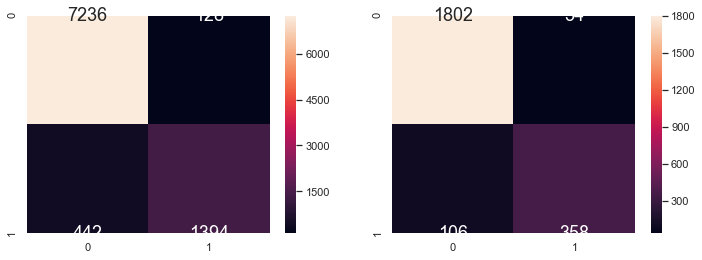

In [122]:
LogReg = LogisticRegression()

LogReg.fit(X_train,np.ravel(y_train)) #fit Logistic Regression to the train dataset

y_train_pred = LogReg.predict(X_train)
y_test_pred = LogReg.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", LogReg.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", LogReg.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [123]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7236  128]
 [ 442 1394]]
FPR= 0.017381857686040194
FNR= 0.24074074074074073

Test Dataset:
[[1802   34]
 [ 106  358]]
FPR= 0.018518518518518517
FNR= 0.22844827586206898


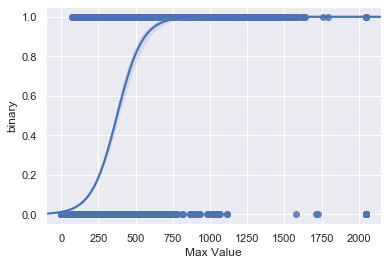

In [124]:
sb.regplot(x = "Max Value", y = "binary", data = EEGdata, logistic = True) #plot datapoints and the logistic function curve

In [125]:
y = pd.DataFrame(EEGdata["binary"])
X = pd.DataFrame(EEGdata["Min Value"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9540217391304348

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9543478260869566



C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


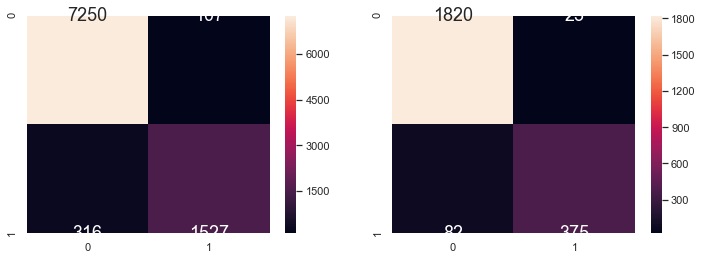

In [126]:
LogReg = LogisticRegression()

LogReg.fit(X_train,np.ravel(y_train)) #fit Logistic Regression to the train dataset

y_train_pred = LogReg.predict(X_train)
y_test_pred = LogReg.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", LogReg.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", LogReg.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [127]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7250  107]
 [ 316 1527]]
FPR= 0.014543971727606362
FNR= 0.17145957677699403

Test Dataset:
[[1820   23]
 [  82  375]]
FPR= 0.012479652740097666
FNR= 0.17943107221006566


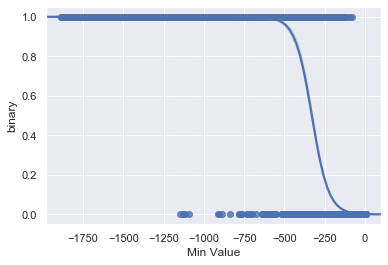

In [128]:
sb.regplot(x = "Min Value", y = "binary", data = EEGdata, logistic = True) #plot datapoints and the logistic function curve

In [129]:
y = pd.DataFrame(EEGdata["binary"])
X = pd.DataFrame(EEGdata["Max rate of change"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (9200, 1) (9200, 1)
Test Set  : (2300, 1) (2300, 1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9484782608695652

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9456521739130435



C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


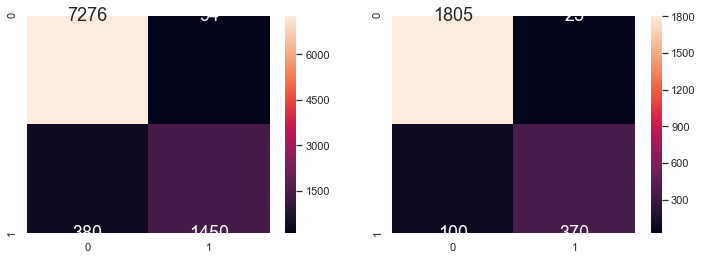

In [130]:
LogReg = LogisticRegression()

LogReg.fit(X_train,np.ravel(y_train))

y_train_pred = LogReg.predict(X_train)
y_test_pred = LogReg.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", LogReg.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", LogReg.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [131]:
print("Train Dataset:")
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

print("\r")
print("Test Dataset:")
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

false_positive_rate = FP / float(TN + FP)
print("FPR=",false_positive_rate)

false_negative_rate = FN / float(FN + TP)
print("FNR=",false_negative_rate)

Train Dataset:
[[7276   94]
 [ 380 1450]]
FPR= 0.012754409769335142
FNR= 0.20765027322404372

Test Dataset:
[[1805   25]
 [ 100  370]]
FPR= 0.01366120218579235
FNR= 0.2127659574468085


C:\Users\CHEN QING AN\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


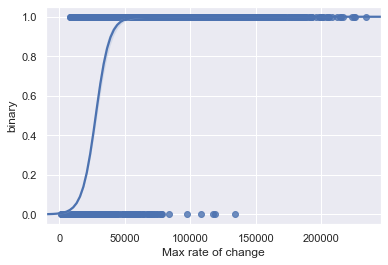

In [132]:
sb.regplot(x = "Max rate of change", y = "binary", data = EEGdata, logistic = True) #plot datapoints and the logistic function curve